In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import torch

In [3]:
data = pd.read_csv('../DS_InterviewPrep/clinical_research_data.csv')

In [4]:
data = data.drop('Patient_ID', axis=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
data

,Age,Weight,Treatment_Group,Health_Score_Pre,Health_Score_Post,Outcome
0,57,50.233166,Treatment_B,13.415352,13.679151,Improved
1,63,63.210165,Treatment_A,70.881730,85.168640,Improved
2,32,NaN,Treatment_A,15.321342,29.519087,Declined
3,28,67.990810,Control,0.254654,6.784032,Stable
4,29,62.010881,Control,1.400356,0.122498,Declined
...,...,...,...,...,...,...
495,38,76.819206,Treatment_A,11.607622,3.818122,Improved
496,53,94.645045,Treatment_B,17.730564,18.423971,Declined
497,58,96.966564,Treatment_B,66.973642,78.334914,Declined
498,71,60.905009,Control,68.940567,64.603135,Declined


In [8]:
data = data.dropna()

features = data[['Weight', 'Age', 'Treatment_Group', 'Health_Score_Pre']]
labels = data['Outcome']

le = LabelEncoder()
new_treatment_group = le.fit_transform(features['Treatment_Group'])
features['Treatment_Group'] = new_treatment_group
# features = features.dropna()

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(features, labels)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_48771/453795823.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Treatment_Group'] = new_treatment_group


In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
X_test

,Weight,Age,Treatment_Group,Health_Score_Pre
433,58.933319,23,2,7.913847
251,88.931920,49,2,4.271834
383,92.367201,77,0,60.773763
432,95.499176,72,1,47.465417
317,62.346024,25,1,41.548568
...,...,...,...,...
229,97.448851,41,0,54.284659
484,92.977589,47,2,49.920304
102,99.641329,43,2,41.154708
346,80.894922,68,0,90.762920


In [11]:
y_test

433    Improved
251    Declined
383    Improved
432      Stable
317      Stable
         ...   
229    Declined
484    Declined
102      Stable
346      Stable
266    Declined
Name: Outcome, Length: 120, dtype: object

In [12]:
#Meana ccuracy
model.score(X_test, y_test)

0.35833333333333334

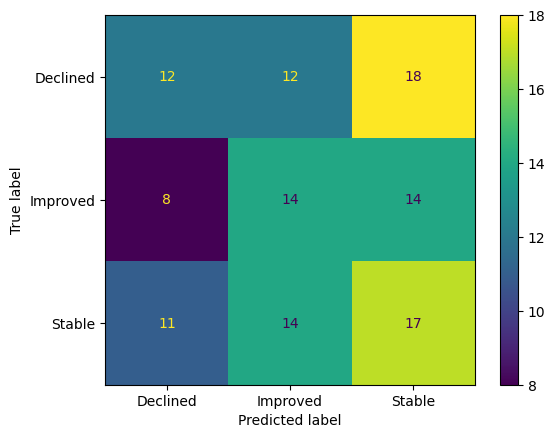

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cm.plot()

In [14]:
y_scores = model.predict_proba(X_test)
y_scores

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [15]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average = 'macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_scores, multi_class='ovr')


print('Precision: ', precision)
print(recall)
print(accuracy)
print(f1)
print(roc_auc)

Precision:  0.36134518323458414
0.3597883597883598
0.35833333333333334
0.35693818318187454
0.5193325193325192


### Engineer Some Features

- BMI

- Age Split

- ???

### PyTorch Workflow


- Data Prep
- Model Definition
- Loss Function and Optimizer
- Training Loop
- Evaluation




In [16]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        sample = self.data[index]
        target = self.targets[index]
        return sample, target

In [17]:
labels = labels.astype('category')
labels = labels.cat.codes

In [18]:
labels=labels.to_numpy().astype('float64')

In [19]:
torch_data = MyDataset(features.to_numpy().astype('float32'), labels.astype('float32'))
torch_data.data

array([[50.233166, 57.      ,  2.      , 13.415352],
       [63.210167, 63.      ,  1.      , 70.88173 ],
       [67.99081 , 28.      ,  0.      ,  0.254654],
       ...,
       [96.96656 , 58.      ,  2.      , 66.97364 ],
       [60.90501 , 71.      ,  0.      , 68.94057 ],
       [78.0916  , 66.      ,  0.      , 24.251183]], dtype=float32)

In [42]:
from torch.utils.data import DataLoader

data_loader = DataLoader(torch_data, batch_size=24, shuffle=True)

In [43]:
len(torch_data.data)

480

In [44]:
for i, (inputs, label) in enumerate(data_loader):
    print(i, inputs, label)

0 tensor([[ 71.0537,  21.0000,   0.0000,  65.1545],
        [ 58.3407,  48.0000,   1.0000,  94.9377],
        [ 56.1077,  59.0000,   0.0000,  83.9046],
        [ 96.4133,  43.0000,   2.0000,  48.5215],
        [ 85.2442,  40.0000,   1.0000,  82.0747],
        [ 52.2418,  69.0000,   0.0000,   9.5632],
        [ 86.2490,  47.0000,   2.0000,   0.9319],
        [ 94.7348,  27.0000,   0.0000,  37.2466],
        [ 65.2899,  33.0000,   0.0000,  85.5452],
        [ 72.9075,  71.0000,   1.0000,   6.2716],
        [ 87.2236,  54.0000,   2.0000,  86.8370],
        [ 87.4561,  36.0000,   0.0000, 128.8241],
        [ 88.6417,  74.0000,   2.0000,  96.9981],
        [ 88.0422,  47.0000,   1.0000, 139.2767],
        [ 85.7854,  25.0000,   2.0000,  68.9795],
        [ 94.6232,  34.0000,   2.0000, 103.9721],
        [ 85.5548,  74.0000,   0.0000,  42.9675],
        [ 58.2887,  69.0000,   1.0000,  40.8526],
        [ 74.8992,  29.0000,   0.0000,  14.1959],
        [ 58.9027,  31.0000,   2.0000,  63.3724]

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 4
hidden_size = 4
num_classes = 3
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
learning_rate = .01
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

num_epochs = 500
for epoch in range(num_epochs):
    for i, (inputs, label) in enumerate(data_loader):
        outputs = model(inputs)
        loss = criterion(outputs, label.long())
        print(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



9.045451164245605
10.608619689941406
11.156155586242676
8.664807319641113
6.822685241699219
8.441082954406738
7.704537868499756
5.7140727043151855
6.871723175048828
5.309784889221191
2.112410068511963
2.29418683052063
2.418792963027954
2.401573896408081
3.8390121459960938
2.374063491821289
3.1616971492767334
3.7324981689453125
2.6266090869903564
3.4650208950042725
3.0281989574432373
1.5426453351974487
3.321002244949341
2.7356374263763428
1.8282122611999512
2.4854342937469482
1.6188050508499146
1.4464911222457886
2.131045341491699
1.7929329872131348
1.4258745908737183
1.7546700239181519
1.8556419610977173
1.6263527870178223
1.9931496381759644
1.4638161659240723
1.7584433555603027
1.9732962846755981
1.6311947107315063
1.865344524383545
1.7258118391036987
1.4077606201171875
1.9682841300964355
1.3421036005020142
1.522544026374817
1.2163907289505005
1.1232202053070068
1.2944883108139038
1.2402111291885376
1.3862162828445435
1.300057053565979
1.6084595918655396
1.0077539682388306
1.095013022

In [46]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in data_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.long()).sum().item()
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 35.416666666666664 %


In [41]:
inputs

tensor([[75.2863, 77.0000,  2.0000, 94.5479]])

In [38]:
model.eval()

with torch.no_grad():
    predictions = model(inputs)

In [39]:
predictions

tensor([[-0.0224,  0.0334,  0.1639]])

# Assignment Practice 2

- Extracting and cleaning data (handling missing values, normalization).
- Preparing the data for modeling (feature selection, data transformation).
- Building a simple machine learning model.
- Evaluating the model's performance.

In [109]:
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('./clinical_research_data.csv')
data = data.drop(columns='Patient_ID')
data

,Age,Weight,Treatment_Group,Health_Score_Pre,Health_Score_Post,Outcome
0,57,50.233166,Treatment_B,13.415352,13.679151,Improved
1,63,63.210165,Treatment_A,70.881730,85.168640,Improved
2,32,NaN,Treatment_A,15.321342,29.519087,Declined
3,28,67.990810,Control,0.254654,6.784032,Stable
4,29,62.010881,Control,1.400356,0.122498,Declined
...,...,...,...,...,...,...
495,38,76.819206,Treatment_A,11.607622,3.818122,Improved
496,53,94.645045,Treatment_B,17.730564,18.423971,Declined
497,58,96.966564,Treatment_B,66.973642,78.334914,Declined
498,71,60.905009,Control,68.940567,64.603135,Declined


/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_48771/3133600995.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  impute_values = ages_to_avg.groupby(['Age']).mean()['Weight']
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_48771/3133600995.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_scores.loc[67, 'Health_Score_Post'] = np.nan
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_48771/3133600995.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

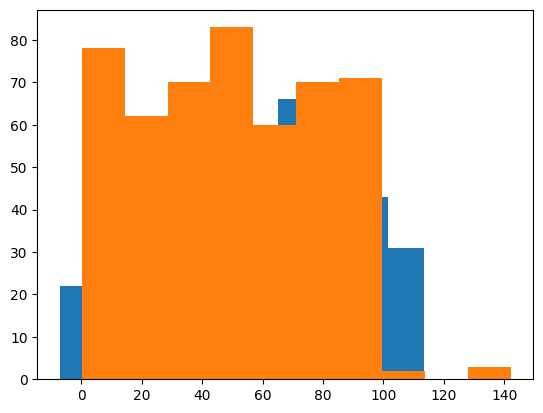

In [112]:
# Clean the data by removing NaN 
simple_drop = data.dropna()

# Clean data by imputing NaN weight with Median weight for the person's age
ages_to_fill = data[data['Weight'].isna()==True]['Age']
ages_to_avg = data[data['Age'].isin(ages_to_fill)]
impute_values = ages_to_avg.groupby(['Age']).mean()['Weight']
data['Weight'] = data.apply(
    lambda row: impute_values[row['Age']] if pd.isnull(row['Weight']) else row['Weight'],
    axis = 1)


# Clean data by turning NaN treamtent to Control
data['Treatment_Group'].isna().unique() # ==> All good
data.loc[34, 'Treatment_Group'] = np.nan
data['Treatment_Group'].isna().unique() # ==> Now a NaN
data['Treatment_Group'].fillna('Control', inplace=True)
data['Treatment_Group'].isna().unique() # ==> Now fixed again


#Decide on Best imputation metric for Health Score by examining Distribution
health_scores = data[['Health_Score_Pre', 'Health_Score_Post']]
health_scores['Health_Score_Post'].isna().unique()
health_scores['Health_Score_Pre'].isna().unique()
health_scores.loc[67, 'Health_Score_Post'] = np.nan
health_scores.loc[90, 'Health_Score_Pre'] = np.nan
plt.hist(health_scores['Health_Score_Post']) # =>
plt.hist(health_scores['Health_Score_Pre']) # => Both pretty normal
health_scores['Health_Score_Post'].fillna(health_scores['Health_Score_Post'].median(), inplace=True)
health_scores['Health_Score_Pre'].fillna(health_scores['Health_Score_Pre'].mean(), inplace=True)


#Drop any non-labeled outcomes

### Normalization

- All missing values have been dealt with appropriatley 

- Let's normalize the data in preperation for our ML Model

In [129]:
from sklearn.preprocessing import OneHotEncoder

# First, let's split labels and features
features, labels = data[['Weight', 'Age', 'Treatment_Group', 'Health_Score_Pre']], data['Outcome']

# Let's one-hot encode Treatment Group in the features and Outcome since they are Nominal Data
encoder = OneHotEncoder()
treatment_group_encoded = encoder.fit_transform(features[['Treatment_Group']])
features = features.drop(columns=['Treatment_Group'])
features = pd.concat([features, pd.DataFrame(treatment_group_encoded.toarray(), columns=encoder.get_feature_names_out())], axis=1)
# print(features)

labels_encoded = encoder.fit_transform(labels.values.reshape(-1, 1))
labels = pd.DataFrame(labels_encoded.toarray(), columns=encoder.get_feature_names_out())
labels



,x0_Declined,x0_Improved,x0_Stable
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
495,0.0,1.0,0.0
496,1.0,0.0,0.0
497,1.0,0.0,0.0
498,1.0,0.0,0.0


In [130]:
features

,Weight,Age,Health_Score_Pre,Treatment_Group_Control,Treatment_Group_Treatment_A,Treatment_Group_Treatment_B
0,50.233166,57,13.415352,0.0,0.0,1.0
1,63.210165,63,70.881730,0.0,1.0,0.0
2,75.761366,32,15.321342,0.0,1.0,0.0
3,67.990810,28,0.254654,1.0,0.0,0.0
4,62.010881,29,1.400356,1.0,0.0,0.0
...,...,...,...,...,...,...
495,76.819206,38,11.607622,0.0,1.0,0.0
496,94.645045,53,17.730564,0.0,0.0,1.0
497,96.966564,58,66.973642,0.0,0.0,1.0
498,60.905009,71,68.940567,1.0,0.0,0.0


### Normalization Continued

- The features that are continuous need to be normalized from 0-1

In [140]:
# Build a function that scales the data between 0 and 1

def myScaler(column):
    mu = np.mean(column)
    return (column-mu)/np.std(column)

cols = ['Health_Score_Pre', 'Weight', 'Age']
scaled_data = pd.concat([myScaler(features[col]) for col in cols], axis = 1)
features[['Weight', 'Health_Score_Pre', 'Age']]=scaled_data
features 

,Weight,Age,Health_Score_Pre,Treatment_Group_Control,Treatment_Group_Treatment_A,Treatment_Group_Treatment_B
0,-1.740789,0.520308,-1.229193,0.0,0.0,1.0
1,-0.832034,0.877662,0.697293,0.0,1.0,0.0
2,0.046903,-0.968668,-1.165297,0.0,1.0,0.0
3,-0.497255,-1.206904,-1.670388,1.0,0.0,0.0
4,-0.916018,-1.147345,-1.631980,1.0,0.0,0.0
...,...,...,...,...,...,...
495,0.120981,-0.611314,-1.289795,0.0,1.0,0.0
496,1.369291,0.282072,-1.084531,0.0,0.0,1.0
497,1.531863,0.579867,0.566279,0.0,0.0,1.0
498,-0.993460,1.354134,0.632218,1.0,0.0,0.0


### Build out a simple PyTorch Model to Predict the Clinical Outcome of Patient Following The Treatment

In [141]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [166]:
class MyDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = torch.tensor(inputs.to_numpy().astype('float32'))
        self.labels = torch.tensor(labels.to_numpy().astype('float32'))

    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self, idx):
        xVal = self.inputs[idx]
        yVal = self.labels[idx]
        return xVal, yVal

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels)
train_dataset = MyDataset(X_train, y_train)
test_datatset = MyDataset(X_test, y_test)

data_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)

In [168]:
for idx, (inputs, label) in enumerate(train_dataset):
    print(idx, inputs, label)

0 tensor([ 1.3236, -1.5643, -1.6353,  1.0000,  0.0000,  0.0000]) tensor([0., 1., 0.])
1 tensor([ 0.8190, -1.2665,  0.4838,  0.0000,  0.0000,  1.0000]) tensor([0., 0., 1.])
2 tensor([0.9489, 1.5328, 1.5728, 0.0000, 0.0000, 1.0000]) tensor([0., 0., 1.])
3 tensor([-1.1954,  0.9968,  0.0255,  1.0000,  0.0000,  0.0000]) tensor([0., 0., 1.])
4 tensor([-1.4589,  0.9968, -0.8021,  1.0000,  0.0000,  0.0000]) tensor([0., 0., 1.])
5 tensor([-1.4247, -0.3731, -0.2453,  1.0000,  0.0000,  0.0000]) tensor([0., 1., 0.])
6 tensor([ 0.9069, -0.0753,  2.9901,  0.0000,  1.0000,  0.0000]) tensor([0., 0., 1.])
7 tensor([-0.4973, -1.2069, -1.6704,  1.0000,  0.0000,  0.0000]) tensor([0., 0., 1.])
8 tensor([ 0.5970, -0.0753, -1.6431,  1.0000,  0.0000,  0.0000]) tensor([0., 0., 1.])
9 tensor([-0.0934, -1.6238, -0.1709,  0.0000,  1.0000,  0.0000]) tensor([0., 1., 0.])
10 tensor([ 0.9013, -0.1944, -1.6522,  1.0000,  0.0000,  0.0000]) tensor([0., 1., 0.])
11 tensor([ 1.2537,  0.8181, -0.7999,  0.0000,  0.0000,  1.

In [172]:
## Build the model

input_size = 6
hidden_layer_size = 12
num_classes = 3

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
#Initialize learning_rate
lr = .001
model = Net()
optimizer = optim.Adam(model.parameters(), lr=lr)
epochs = 500
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    for idx, (inputs, label) in enumerate(data_loader):
        output = model(inputs)
        loss = criterion(output, label)
        print(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()





1.1653900146484375
1.1672344207763672
1.1384936571121216
1.1192699670791626
1.1201304197311401
1.1190153360366821
1.1574410200119019
1.1789450645446777
1.1681702136993408
1.1793575286865234
1.0843374729156494
1.1110161542892456
1.135722279548645
1.0831800699234009
1.04550302028656
1.0475690364837646
1.1245306730270386
1.151787281036377
1.0530706644058228
1.1090805530548096
1.1748205423355103
1.084229588508606
1.0885616540908813
1.130369782447815
1.1738555431365967
1.0979958772659302
1.0793424844741821
1.089260458946228
1.103749394416809
1.1613414287567139
1.103105902671814
1.1769187450408936
1.1243573427200317
1.1327487230300903
1.1271339654922485
1.1264822483062744
1.0794949531555176
1.100856900215149
1.0890369415283203
1.1238025426864624
1.1309853792190552
1.1380770206451416
1.1300629377365112
1.0803464651107788
1.0819019079208374
1.1100127696990967
1.1066808700561523
1.0999748706817627
1.061808705329895
1.0986535549163818
1.1575446128845215
1.1657313108444214
1.126064419746399
1.086

In [194]:
arr = np.array([[8, 3, 2],
          [3, 6, 5],
          [6, 1, 4]])

np.array(sorted(arr, key = lambda x: x[-1])) #Columns

np.array([np.sort(sub_array) for sub_array in arr]) #Rows

array([[2, 3, 8],
       [3, 5, 6],
       [1, 4, 6]])

In [195]:
def find_nearestval(arr, x):
    arr = np.asarray(arr)
    idx = np.abs(arr - x).argmin()
    return arr[idx]

reversed_arr = arr[::-1]
reversed_arr

array([[6, 1, 4],
       [3, 6, 5],
       [8, 3, 2]])

In [197]:
arr.shape

(3, 3)

In [201]:
d = {}
d['l'] = 'w'
d.pop('l')
d['l'] = 'w'
d['l'] = 'p'
d

{'l': 'p'}